# Analyzing the results for `sciplex_hparam` with `grover` and `rdkit` sweeps

This is preliminary to the `fintuning_num_genes` and `finetuning_OOD_prediction` experiments. We look at the results of sweeping the optimisation related hyperparameters for fine-tuning on the sciplex dataset for all other embeddings.

In [8]:
import math
from pathlib import Path

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import seml
from matplotlib import pyplot as plt

matplotlib.style.use("fivethirtyeight")
matplotlib.style.use("seaborn-talk")
matplotlib.rcParams['font.family'] = "monospace"
plt.rcParams['savefig.facecolor'] = 'white'
sns.set_context("poster")
pd.set_option('display.max_columns', 100)

In [15]:
results = seml.get_results(
    "sciplex_hparam",
    to_data_frame=True,
    fields=["config", "result", "seml", "config_hash"],
    states=["COMPLETED"],
    filter_dict={
        'batch_id': 3,
        'config.dataset.data_params.split_key': 'split_ood_finetuning'
    }

)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

In [16]:
# Look at number of experiments per model
results["config.model.embedding.model"].value_counts()

rdkit          20
grover_base    20
Name: config.model.embedding.model, dtype: int64

In [36]:
results.loc[:, [c for c in results.columns if 'pretrain' in c]]

,config.model.load_pretrained,config.model.pretrained_model_hashes.GCN,config.model.pretrained_model_hashes.MPNN,config.model.pretrained_model_hashes.grover_base,config.model.pretrained_model_hashes.jtvae,config.model.pretrained_model_hashes.rdkit,config.model.pretrained_model_hashes.seq2seq,config.model.pretrained_model_hashes.vanilla,config.model.pretrained_model_hashes.weave,config.model.pretrained_model_path
0,True,aedb25c686fb856e574a951f749b8dcf,ff9629a1b216372be8b205556cabc6fb,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,e31119adc782888d5b75c57f8c803ee0,ba3569d1f5898a6bb964b7fafbed2641,1244d8b476696a7e1c01fd05d73d7450,/storage/groups/ml01/projects/2021_chemicalCPA...
1,True,aedb25c686fb856e574a951f749b8dcf,ff9629a1b216372be8b205556cabc6fb,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,e31119adc782888d5b75c57f8c803ee0,ba3569d1f5898a6bb964b7fafbed2641,1244d8b476696a7e1c01fd05d73d7450,/storage/groups/ml01/projects/2021_chemicalCPA...
2,True,aedb25c686fb856e574a951f749b8dcf,ff9629a1b216372be8b205556cabc6fb,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,e31119adc782888d5b75c57f8c803ee0,ba3569d1f5898a6bb964b7fafbed2641,1244d8b476696a7e1c01fd05d73d7450,/storage/groups/ml01/projects/2021_chemicalCPA...
3,True,aedb25c686fb856e574a951f749b8dcf,ff9629a1b216372be8b205556cabc6fb,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,e31119adc782888d5b75c57f8c803ee0,ba3569d1f5898a6bb964b7fafbed2641,1244d8b476696a7e1c01fd05d73d7450,/storage/groups/ml01/projects/2021_chemicalCPA...
4,True,aedb25c686fb856e574a951f749b8dcf,ff9629a1b216372be8b205556cabc6fb,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,e31119adc782888d5b75c57f8c803ee0,ba3569d1f5898a6bb964b7fafbed2641,1244d8b476696a7e1c01fd05d73d7450,/storage/groups/ml01/projects/2021_chemicalCPA...
5,True,aedb25c686fb856e574a951f749b8dcf,ff9629a1b216372be8b205556cabc6fb,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,e31119adc782888d5b75c57f8c803ee0,ba3569d1f5898a6bb964b7fafbed2641,1244d8b476696a7e1c01fd05d73d7450,/storage/groups/ml01/projects/2021_chemicalCPA...
6,True,aedb25c686fb856e574a951f749b8dcf,ff9629a1b216372be8b205556cabc6fb,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,e31119adc782888d5b75c57f8c803ee0,ba3569d1f5898a6bb964b7fafbed2641,1244d8b476696a7e1c01fd05d73d7450,/storage/groups/ml01/projects/2021_chemicalCPA...
7,True,aedb25c686fb856e574a951f749b8dcf,ff9629a1b216372be8b205556cabc6fb,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,e31119adc782888d5b75c57f8c803ee0,ba3569d1f5898a6bb964b7fafbed2641,1244d8b476696a7e1c01fd05d73d7450,/storage/groups/ml01/projects/2021_chemicalCPA...
8,True,aedb25c686fb856e574a951f749b8dcf,ff9629a1b216372be8b205556cabc6fb,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,e31119adc782888d5b75c57f8c803ee0,ba3569d1f5898a6bb964b7fafbed2641,1244d8b476696a7e1c01fd05d73d7450,/storage/groups/ml01/projects/2021_chemicalCPA...
9,True,aedb25c686fb856e574a951f749b8dcf,ff9629a1b216372be8b205556cabc6fb,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,e31119adc782888d5b75c57f8c803ee0,ba3569d1f5898a6bb964b7fafbed2641,1244d8b476696a7e1c01fd05d73d7450,/storage/groups/ml01/projects/2021_chemicalCPA...


In [18]:
pd.crosstab(
    results['config.model.embedding.model'],
    results['result.perturbation disentanglement'].isnull()
)

result.perturbation disentanglement,False
config.model.embedding.model,
grover_base,20
rdkit,20


In [19]:
[c for c in results.columns if 'split' in c]

['config.dataset.data_params.split_key']

In [20]:
pd.crosstab(
    results['config.dataset.data_params.split_key'],
    results['result.perturbation disentanglement'].isnull()
)

result.perturbation disentanglement,False
config.dataset.data_params.split_key,
split_ood_finetuning,40


In [21]:
pd.crosstab(
    results['config.dataset.data_params.split_key'],
    results['result.loss_reconstruction'].isnull()
)

result.loss_reconstruction,False
config.dataset.data_params.split_key,
split_ood_finetuning,40


In [22]:
# columns
results.isnull().any()[results.isnull().any()]

config.model.embedding.directory    True
dtype: bool

In [25]:
# rows without nans 
clean_id = results.loc[~results['result.training'].isnull(), '_id']
# clean_id

## Preprocessing the results dataframe

In [26]:
sweeped_params = [
    # "model.hparams.dim",
    # "model.hparams.dropout",
    # "model.hparams.dosers_width",
    # "model.hparams.dosers_depth",
    "model.hparams.dosers_lr",
    "model.hparams.dosers_wd",
    # "model.hparams.autoencoder_width",
    # "model.hparams.autoencoder_depth",
    "model.hparams.autoencoder_lr",
    "model.hparams.autoencoder_wd",
    "model.hparams.adversary_width",
    "model.hparams.adversary_depth",
    "model.hparams.adversary_lr",
    "model.hparams.adversary_wd",
    "model.hparams.adversary_steps",
    "model.hparams.reg_adversary",
    "model.hparams.penalty_adversary",
    "model.hparams.batch_size",
    "model.hparams.step_size_lr",
    # "model.hparams.embedding_encoder_width",
    # "model.hparams.embedding_encoder_depth",
]

In [27]:
# percentage of training runs that resulted in NaNs or totally failed

results_clean = results[results._id.isin(clean_id)].copy()
print(f"Percentage of invalid (nan) runs: {1 - len(clean_id) / len(results)}")

# Remove runs with r2 < 0.6 on the training set
# results_clean = results_clean[results_clean['result.training'].apply(lambda x: x[0][0])>0.6]

Percentage of invalid (nan) runs: 0.0


In [28]:
results_clean["config.model.embedding.model"].value_counts()

rdkit          20
grover_base    20
Name: config.model.embedding.model, dtype: int64

In [29]:
# calculate some stats
get_mean = lambda x: np.array(x)[-1, 0]
get_mean_de = lambda x: np.array(x)[-1, 1]

results_clean["result.training_mean"] = results_clean["result.training"].apply(get_mean)
results_clean["result.training_mean_de"] = results_clean["result.training"].apply(get_mean_de)
results_clean["result.val_mean"] = results_clean["result.test"].apply(get_mean)
results_clean["result.val_mean_de"] = results_clean["result.test"].apply(get_mean_de)
results_clean["result.test_mean"] = results_clean["result.ood"].apply(get_mean)
results_clean["result.test_mean_de"] = results_clean["result.ood"].apply(get_mean_de)
results_clean["result.perturbation disentanglement"] = results_clean["result.perturbation disentanglement"].apply(lambda x: x[0])
results_clean["result.final_reconstruction"] = results_clean["result.loss_reconstruction"].apply(lambda x: x[-1])

results_clean.head(3)

,_id,config_hash,seml.executable,seml.name,seml.output_dir,seml.conda_environment,seml.working_dir,seml.source_files,seml.output_file,seml.command,seml.temp_dir,config.overwrite,config.db_collection,config.dataset.data_params.covariate_keys,config.dataset.data_params.dataset_path,config.dataset.data_params.degs_key,config.dataset.data_params.dose_key,config.dataset.data_params.pert_category,config.dataset.data_params.perturbation_key,config.dataset.data_params.smiles_key,config.dataset.data_params.split_key,config.dataset.data_params.use_drugs_idx,config.dataset.dataset_type,config.model.additional_params.decoder_activation,config.model.additional_params.doser_type,config.model.additional_params.patience,config.model.additional_params.seed,config.model.embedding.directory,config.model.embedding.model,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_steps,config.model.hparams.adversary_wd,config.model.hparams.adversary_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.autoencoder_width,config.model.hparams.batch_size,config.model.hparams.dim,config.model.hparams.dosers_depth,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.dosers_width,config.model.hparams.dropout,config.model.hparams.embedding_encoder_depth,config.model.hparams.embedding_encoder_width,config.model.hparams.penalty_adversary,config.model.hparams.reg_adversary,config.model.hparams.step_size_lr,config.model.load_pretrained,config.model.pretrained_model_hashes.GCN,config.model.pretrained_model_hashes.MPNN,config.model.pretrained_model_hashes.grover_base,config.model.pretrained_model_hashes.jtvae,config.model.pretrained_model_hashes.rdkit,config.model.pretrained_model_hashes.seq2seq,config.model.pretrained_model_hashes.vanilla,config.model.pretrained_model_hashes.weave,config.model.pretrained_model_path,config.profiling.outdir,config.profiling.run_profiler,config.training.checkpoint_freq,config.training.full_eval_during_train,config.training.max_minutes,config.training.num_epochs,config.training.run_eval_disentangle,config.training.save_checkpoints,config.training.save_dir,config.seed,result.epoch,result.stats_epoch,result.loss_reconstruction,result.loss_adv_drugs,result.loss_adv_covariates,result.penalty_adv_drugs,result.penalty_adv_covariates,result.elapsed_time_min,result.training,result.test,result.ood,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.total_epochs,result.training_mean,result.training_mean_de,result.val_mean,result.val_mean_de,result.test_mean,result.test_mean_de,result.final_reconstruction
0,211,83ee53baf18468ab333de528d788baea,compert/seml_sweep_icb.py,ft_sciplex_hparam,/mnt/home/icb/leon.hetzel/git/CPA_graphs/sweep...,chemical_CPA,/mnt/home/icb/leon.hetzel/git/CPA_graphs,"[[compert/__init__.py, 61fa8db356e95a5b5f9ba17...",/mnt/home/icb/leon.hetzel/git/CPA_graphs/sweep...,python compert/seml_sweep_icb.py with 'model={...,/tmp/e3bd1290-5dd3-4e42-80f8-97880a08816f,211,sciplex_hparam,cell_type,/storage/groups/ml01/projects/2021_chemicalCPA...,lincs_DEGs,dose,cov_drug_dose_name,condition,SMILES,split_ood_finetuning,True,trapnell,linear,amortized,4,1337,None,rdkit,4,0.000364,2,7.459343e-07,256,4,0.000561,1.329292e-07,256,32,32,3,0.000561,1.329292e-07,64,0.262378,4,128,0.072749,15.355287,50,True,aedb25c686fb856e574a951f749b8dcf,ff9629a1b216372be8b205556cabc6fb,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,e31119adc782888d5b75c57f8c803ee0,ba3569d1f5898a6bb964b7fafbed2641,1244d8b476696a7e1c01fd05d73d7450,/storage/groups/ml01/projects/2021_chemicalCPA...,./,False,15,False,1200,1500,True,True,/storage/groups/ml01/projects/2021_chemicalCPA...,995769705,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[195],"[21185.25660219461, -21160.7996307

In [40]:
# results_clean["config.model.load_pretrained"]

<AxesSubplot:xlabel='config.model.load_pretrained', ylabel='result.final_reconstruction'>

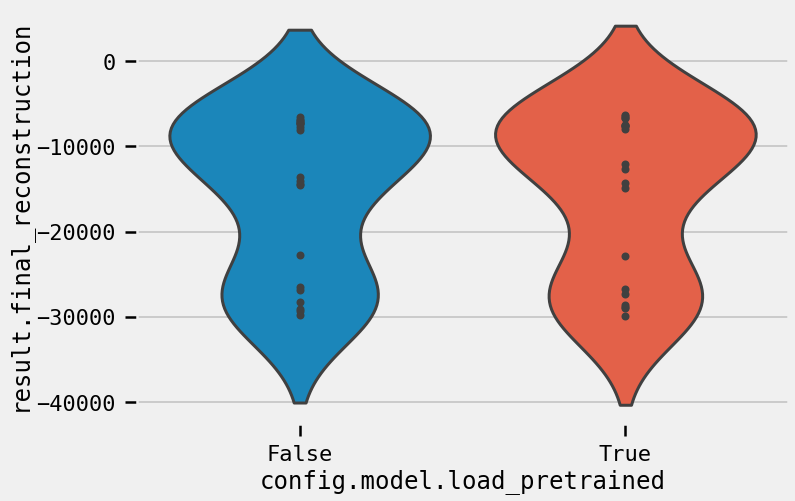

In [46]:
# results_clean.plot.box(by="config.model.load_pretrained", y="result.final_reconstruction")
sns.violinplot(data=results_clean, x="config.model.load_pretrained", y="result.final_reconstruction", inner='point', scale='width')

## Look at early stopping

Text(0.5, 1.0, 'Total epochs before final stopping (min 125)')

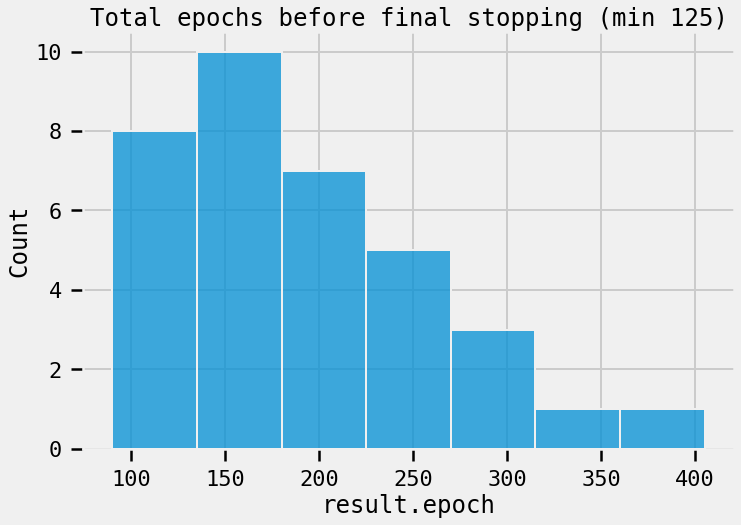

In [70]:
ax = sns.histplot(data=results_clean["result.epoch"].apply(max))
ax.set_title("Total epochs before final stopping (min 125)")

## Look at $r^2$ reconstruction

In [71]:
[c for c in results_clean.columns if 'pretrain' in c]

results_clean[["config.model.embedding.model", 'config.model.load_pretrained']]

,config.model.embedding.model,config.model.load_pretrained
0,rdkit,True
1,rdkit,True
2,rdkit,True
3,rdkit,True
4,rdkit,True
5,rdkit,True
6,rdkit,True
7,rdkit,True
8,rdkit,True
9,rdkit,True


### DE genes

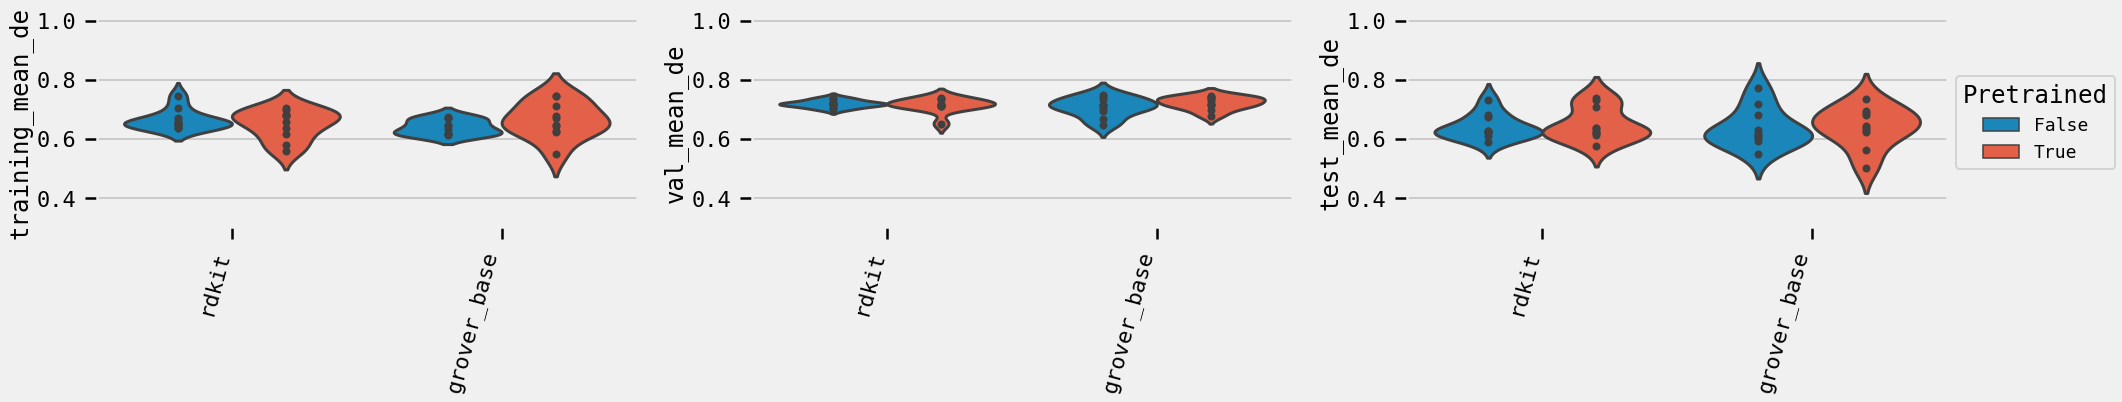

In [51]:
# DE genes
rows, cols = 1, 3
fig, ax = plt.subplots(rows, cols, figsize=(10*cols,6*rows))

for i, y in enumerate(("result.training_mean_de", "result.val_mean_de", "result.test_mean_de")):
    sns.violinplot(
        data=results_clean, 
        x="config.model.embedding.model", 
        y=y, 
        hue='config.model.load_pretrained', 
        inner='points', 
        ax=ax[i], 
        scale='width',
        )
    ax[i].set_ylim([0.3,1.01])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=75, ha='right')
    ax[i].set_xlabel('')
    ax[i].set_ylabel(y.split('.')[-1])
    ax[i].legend(title='Pretrained',loc='lower right', fontsize=18, title_fontsize=24)

ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].legend(title='Pretrained', fontsize=18, title_fontsize=24, loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

### All genes

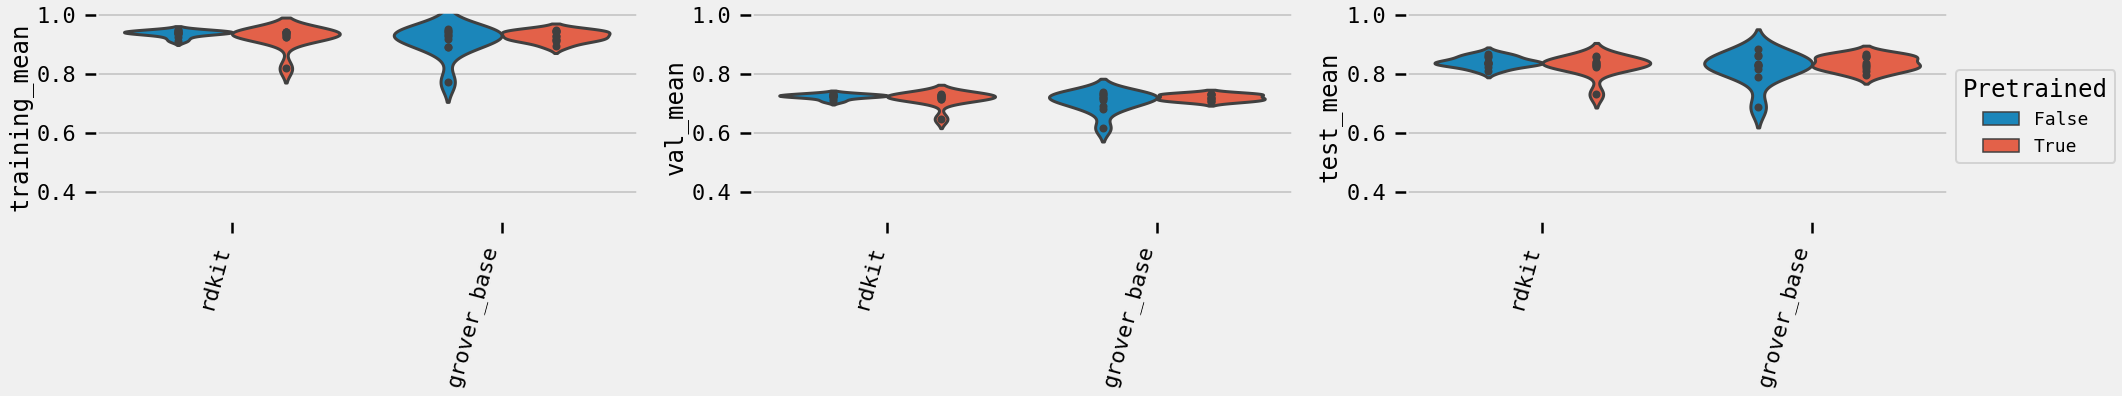

In [52]:
# DE genes
rows, cols = 1, 3
fig, ax = plt.subplots(rows, cols, figsize=(10*cols,6*rows))

for i, y in enumerate(("result.training_mean", "result.val_mean", "result.test_mean")):
    sns.violinplot(
        data=results_clean, 
        x="config.model.embedding.model", 
        y=y, 
        hue='config.model.load_pretrained', 
        inner='points', 
        ax=ax[i], 
        scale='width',
        )
    ax[i].set_ylim([0.3,1.01])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=75, ha='right')
    ax[i].set_xlabel('')
    ax[i].set_ylabel(y.split('.')[-1])
    ax[i].legend(title='Pretrained',loc='lower right', fontsize=18, title_fontsize=24)

ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].legend(title='Pretrained', fontsize=18, title_fontsize=24, loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Look at disentanglement scores

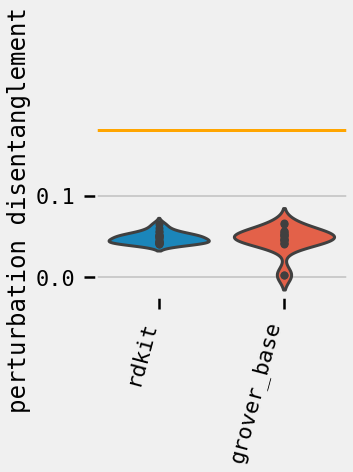

In [55]:
rows = 1 
cols = 1
fig, ax = plt.subplots(rows, cols, figsize=(4*cols, 3*rows), sharex=True)

for y in ["result.perturbation disentanglement"]:
    sns.violinplot(data=results_clean, x="config.model.embedding.model", y=y, inner='point' ,ax=ax, scale='width')
    # ax[i].set_ylim([0,1])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right')
    ax.axhline(0.18, color='orange')
    ax.set_xlabel('')
    ax.set_ylabel(y.split('.')[-1])
    plt.tight_layout()

## Subselect to disentangled models

In [56]:
n_top = 5

performance_condition = lambda emb, pretrained, max_entangle: (results_clean["config.model.embedding.model"] == emb) & (results_clean["result.perturbation disentanglement"] < max_entangle) & (results_clean["config.model.load_pretrained"] == pretrained)

best = []
for embedding in list(results_clean["config.model.embedding.model"].unique()):
    for pretrained in [True, False]:
        df = results_clean[performance_condition(embedding, pretrained, 0.18)]
        print(embedding, pretrained, len(df))
        best.append(df.sort_values(by="result.val_mean_de", ascending=False).head(n_top))

best = pd.concat(best)

rdkit True 10
rdkit False 10
grover_base True 10
grover_base False 10


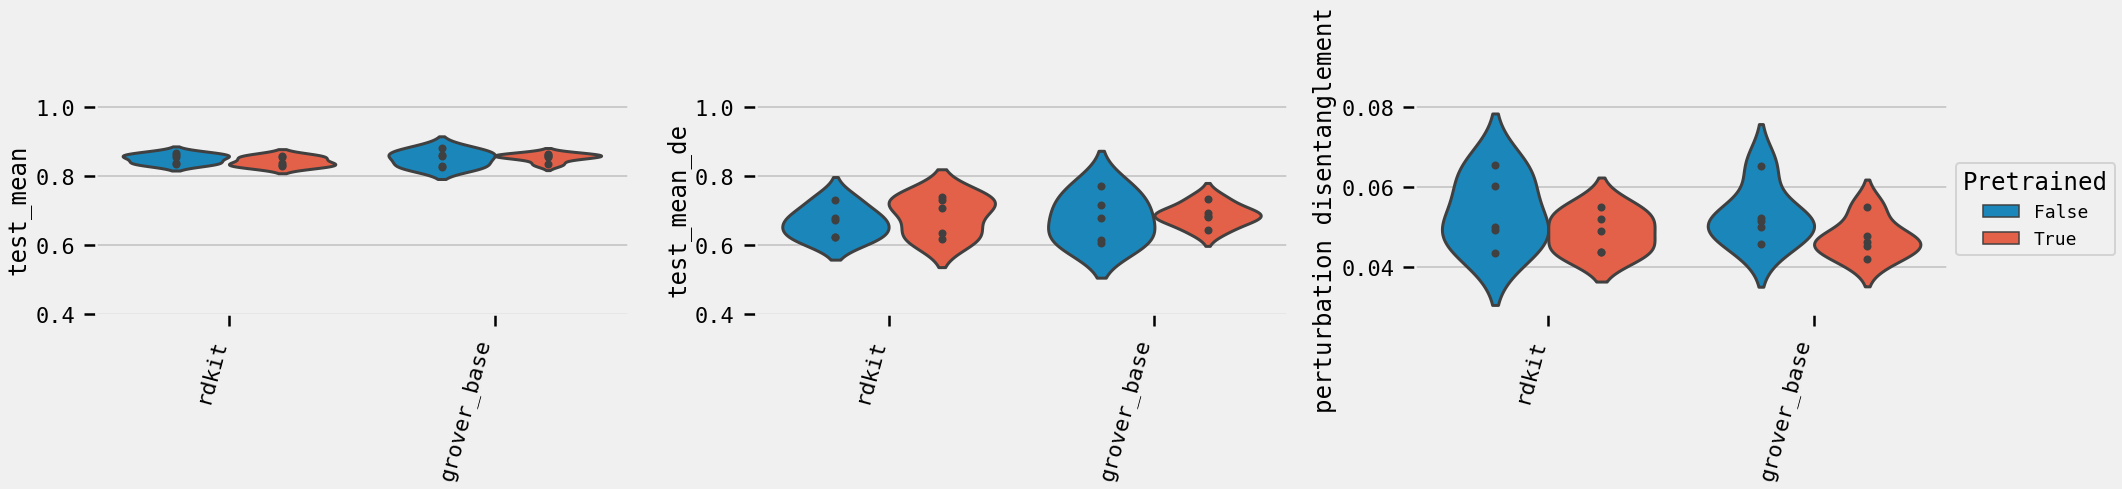

In [61]:
# All genes, DE genes, disentanglement
rows, cols = 1, 3
fig, ax = plt.subplots(rows, cols, figsize=(10*cols,6*rows))

for i, y in enumerate(["result.test_mean", "result.test_mean_de", "result.perturbation disentanglement"]):
    sns.violinplot(
        data=best, 
        x="config.model.embedding.model", 
        y=y, 
        hue='config.model.load_pretrained', 
        inner='points', 
        ax=ax[i], 
        scale='width',
        )
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=75, ha='right')
    ax[i].set_xlabel('')
    ax[i].set_ylabel(y.split('.')[-1])
    ax[i].legend(title='Pretrained',loc='lower right', fontsize=18, title_fontsize=24)
ax[0].get_legend().remove()
ax[0].set_ylim([0.4, 1.01])
ax[1].get_legend().remove()
ax[1].set_ylim([0.4, 1.01])
ax[2].legend(title='Pretrained', fontsize=18, title_fontsize=24, loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()


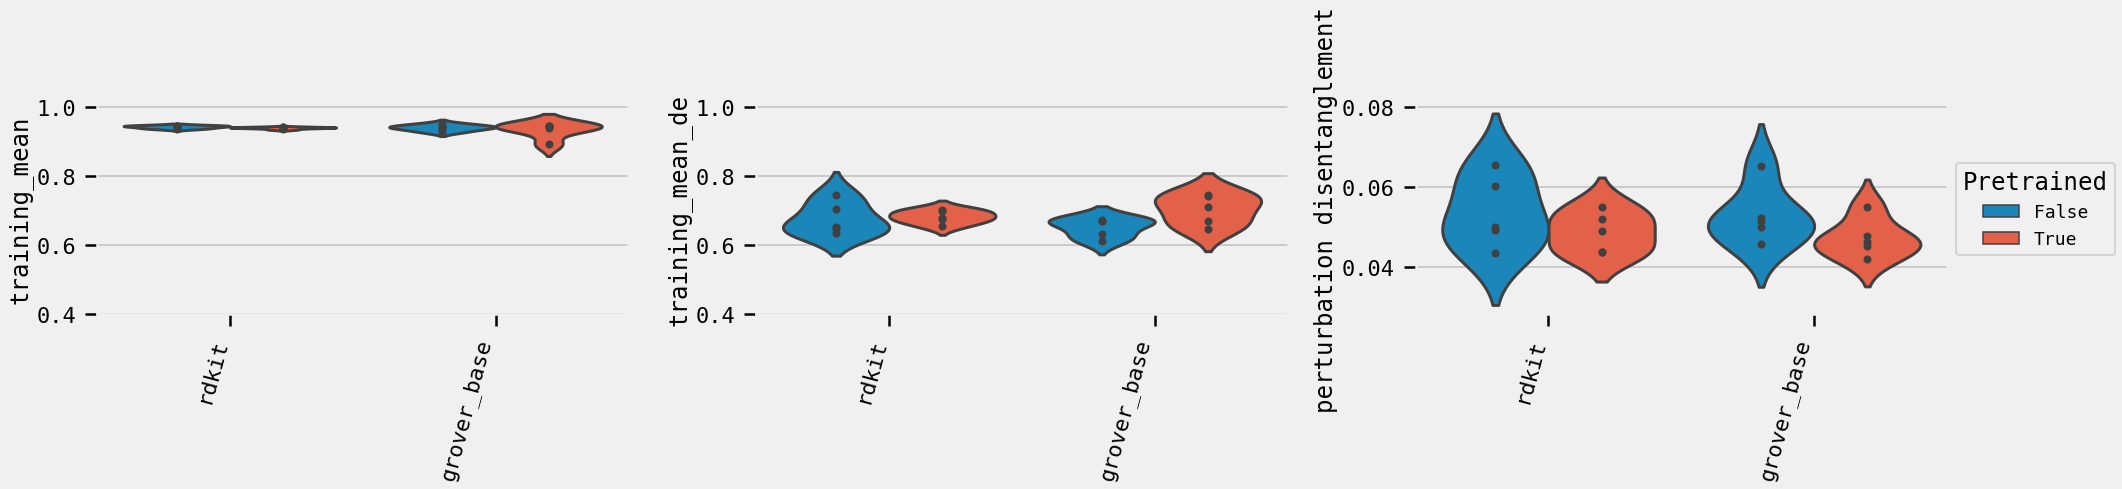

In [62]:
rows, cols = 1, 3
fig, ax = plt.subplots(rows, cols, figsize=(10*cols,6*rows))

for i, y in enumerate(["result.training_mean", "result.training_mean_de", "result.perturbation disentanglement"]):
    sns.violinplot(
        data=best, 
        x="config.model.embedding.model", 
        y=y, 
        hue='config.model.load_pretrained', 
        inner='points', 
        ax=ax[i], 
        scale='width',
        )
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=75, ha='right')
    ax[i].set_xlabel('')
    ax[i].set_ylabel(y.split('.')[-1])
ax[0].get_legend().remove()
ax[0].set_ylim([0.4, 1.01])
ax[1].get_legend().remove()
ax[1].set_ylim([0.4, 1.01])
ax[2].legend(title='Pretrained', fontsize=18, title_fontsize=24, loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Take a deeper look in the `.config` of the best performing models

In [78]:
best[["config." + col for col in sweeped_params] +
     ["result.perturbation disentanglement", "result.test_mean", "result.test_mean_de"]]

,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.adversary_width,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_wd,config.model.hparams.adversary_steps,config.model.hparams.reg_adversary,config.model.hparams.penalty_adversary,config.model.hparams.batch_size,config.model.hparams.step_size_lr,result.perturbation disentanglement,result.test_mean,result.test_mean_de
8,0.001593,6.358359e-07,0.001593,6.358359e-07,128,4,0.001208,1.012920e-05,2,30.271829,0.241648,128,50,0.023571,0.899203,0.794983
0,0.000561,1.329292e-07,0.000561,1.329292e-07,64,4,0.000364,7.459343e-07,2,15.355287,0.072749,32,50,0.023184,0.898439,0.808562
4,0.000205,2.938028e-08,0.000205,2.938028e-08,64,4,0.000114,6.026889e-08,2,7.979119,0.022856,64,50,0.023208,0.902081,0.788413
5,0.000205,2.937538e-08,0.000205,2.937538e-08,256,3,0.000114,6.025216e-08,3,7.978542,0.022853,32,50,0.023172,0.879933,0.785455
3,0.001575,6.251374e-07,0.001575,6.251374e-07,64,4,0.001193,9.846739e-06,3,30.049874,0.238523,64,50,0.024648,0.891644,0.784105
18,0.001593,6.358359e-07,0.001593,6.358359e-07,128,4,0.001208,1.012920e-05,2,30.271829,0.241648,128,50,0.023137,0.901110,0.795674
15,0.000205,2.937538e-08,0.000205,2.937538e-08,256,3,0.000114,6.025216e-08,3,7.978542,0.022853,32,50,0.028301,0.906892,0.803207
16,0.000131,1.493657e-08,0.000131,1.493657e-08,256,3,0.000068,1.951722e-08,2,5.950295,0.013604,32,50,0.025069,0.889004,0.772125
13,0.001575,6.251374e-07,0.001575,6.251374e-07,64,4,0.001193,9.846739e-06,3,30.049874,0.238523,64,50,0.024285,0.899922,0.794250
10,0.000561,1.329292e-07,0.000561,1.329292e-07,64,4,0.000364,7.459343e-07,2,15.355287,0.072749,32,50,0.025620,0.895661,0.783692
